# Introduction to Probability Concepts

This notebook introduces fundamental probability concepts essential for data science applications. We'll explore theoretical concepts and implement practical examples using Python libraries.

## Setup and Imports

Let's start by importing the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Markdown

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

## 1. Basic Probability Concepts

Probability theory provides the mathematical foundation for statistics and many machine learning algorithms. Let's start with the basics:

- **Sample Space (S)**: The set of all possible outcomes of an experiment.
- **Event (E)**: A subset of the sample space (a collection of possible outcomes).
- **Probability (P)**: A measure of the likelihood that an event will occur, with values between 0 and 1.

### Example: Coin Toss and Dice Roll

Probability of getting heads in a fair coin toss: 0.5
Probability of rolling a 6 on a fair die: 0.16666666666666666

After 10000 tosses, empirical probability of heads: 0.5013


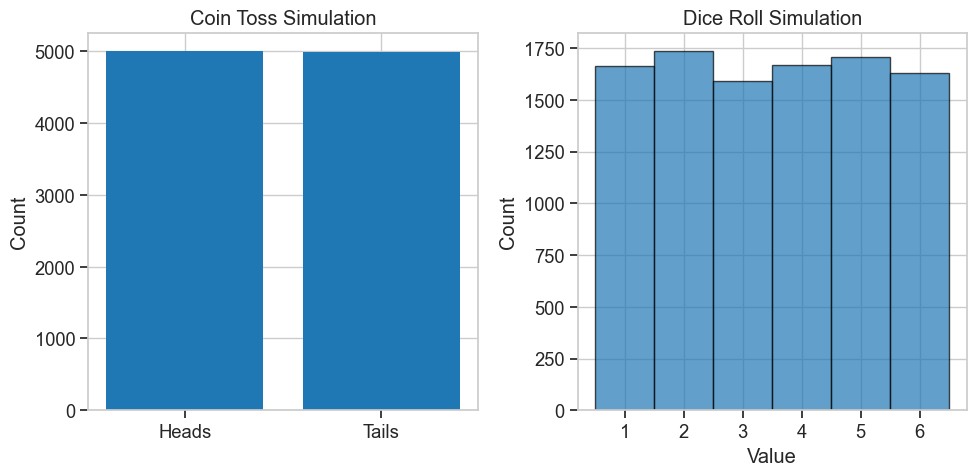

In [2]:
# Define sample spaces
coin_sample_space = ['H', 'T']
dice_sample_space = [1, 2, 3, 4, 5, 6]

# Calculate simple probabilities
p_heads = 1 / len(coin_sample_space)
p_six = 1 / len(dice_sample_space)

print(f"Probability of getting heads in a fair coin toss: {p_heads}")
print(f"Probability of rolling a 6 on a fair die: {p_six}")

# Simulate coin tosses
num_tosses = 10000
coin_tosses = np.random.choice(coin_sample_space, size=num_tosses)
heads_count = np.sum(coin_tosses == 'H')
empirical_p_heads = heads_count / num_tosses

print(f"\nAfter {num_tosses} tosses, empirical probability of heads: {empirical_p_heads:.4f}")

# Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Heads', 'Tails'], [np.sum(coin_tosses == 'H'), np.sum(coin_tosses == 'T')])
plt.title('Coin Toss Simulation')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
dice_rolls = np.random.choice(dice_sample_space, size=num_tosses)
plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), edgecolor='black', alpha=0.7)
plt.title('Dice Roll Simulation')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()

### Example: Cards Probability

Let's calculate the probability of drawing specific cards from a standard deck.

In [3]:
# Cards in a standard deck
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

# Create a deck of cards
deck = [(rank, suit) for rank in ranks for suit in suits]

# Display deck size
print(f"Total cards in the deck: {len(deck)}")

# Calculate probabilities
p_ace = len([card for card in deck if card[0] == 'Ace']) / len(deck)
p_heart = len([card for card in deck if card[1] == 'Hearts']) / len(deck)
p_face_card = len([card for card in deck if card[0] in ['Jack', 'Queen', 'King']]) / len(deck)

print(f"Probability of drawing an Ace: {p_ace:.4f}")
print(f"Probability of drawing a Heart: {p_heart:.4f}")
print(f"Probability of drawing a face card (Jack, Queen, or King): {p_face_card:.4f}")

# Function to calculate probability of a given condition
def card_probability(condition):
    matching_cards = [card for card in deck if condition(card)]
    return len(matching_cards) / len(deck)

# Calculate probability of drawing a red card (Hearts or Diamonds)
p_red = card_probability(lambda card: card[1] in ['Hearts', 'Diamonds'])
print(f"Probability of drawing a red card: {p_red:.4f}")

Total cards in the deck: 52
Probability of drawing an Ace: 0.0769
Probability of drawing a Heart: 0.2500
Probability of drawing a face card (Jack, Queen, or King): 0.2308
Probability of drawing a red card: 0.5000


## 2. Probability Rules and Axioms

Probability follows specific mathematical rules that allow us to calculate complex probabilities:

1. **Non-negativity**: P(E) ≥ 0 for any event E
2. **Total probability**: P(S) = 1 for the sample space S
3. **Addition Rule**: P(A or B) = P(A) + P(B) - P(A and B)
4. **Multiplication Rule**: P(A and B) = P(A) × P(B|A)

Let's implement these rules in Python:

=== Addition Rule Demo ===
Empirical P(Ace) = 0.0777, Theoretical = 0.0769
Empirical P(Heart) = 0.2471, Theoretical = 0.2500
Empirical P(Ace and Heart) = 0.0174, Theoretical = 0.0192
Empirical P(Ace or Heart) = 0.3074, Theoretical = 0.3077
Verification: P(A) + P(B) - P(A and B) = 0.3074


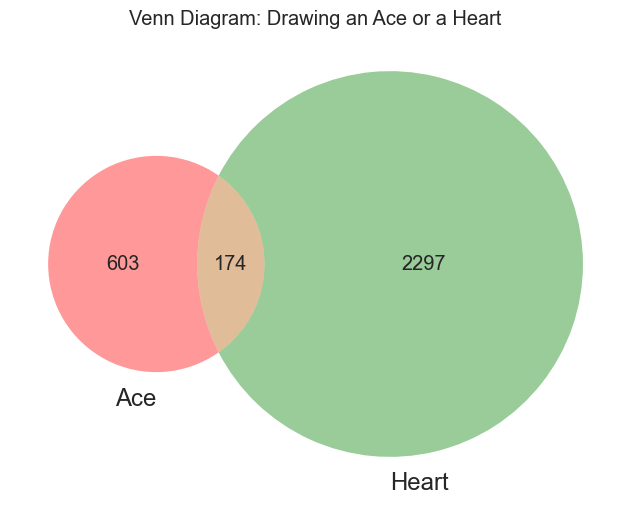

In [4]:
# Create a function to demonstrate the addition rule
def addition_rule_demo(n=1000):
    """Demonstrate the addition rule with a simulation."""
    # Simulate drawing cards
    draws = np.random.choice(range(len(deck)), size=n)
    cards_drawn = [deck[i] for i in draws]
    
    # Define events
    event_A = [card for card in cards_drawn if card[0] == 'Ace']  # Drawing an Ace
    event_B = [card for card in cards_drawn if card[1] == 'Hearts']  # Drawing a Heart
    event_A_and_B = [card for card in cards_drawn if card[0] == 'Ace' and card[1] == 'Hearts']  # Drawing Ace of Hearts
    
    # Calculate probabilities
    p_A = len(event_A) / n
    p_B = len(event_B) / n
    p_A_and_B = len(event_A_and_B) / n
    p_A_or_B = p_A + p_B - p_A_and_B
    
    # Theoretical probabilities
    p_A_theoretical = 4/52  # 4 Aces in 52 cards
    p_B_theoretical = 13/52  # 13 Hearts in 52 cards
    p_A_and_B_theoretical = 1/52  # 1 Ace of Hearts in 52 cards
    p_A_or_B_theoretical = p_A_theoretical + p_B_theoretical - p_A_and_B_theoretical
    
    print("=== Addition Rule Demo ===")
    print(f"Empirical P(Ace) = {p_A:.4f}, Theoretical = {p_A_theoretical:.4f}")
    print(f"Empirical P(Heart) = {p_B:.4f}, Theoretical = {p_B_theoretical:.4f}")
    print(f"Empirical P(Ace and Heart) = {p_A_and_B:.4f}, Theoretical = {p_A_and_B_theoretical:.4f}")
    print(f"Empirical P(Ace or Heart) = {p_A_or_B:.4f}, Theoretical = {p_A_or_B_theoretical:.4f}")
    print(f"Verification: P(A) + P(B) - P(A and B) = {p_A + p_B - p_A_and_B:.4f}")
    
    # Visualize with a Venn diagram
    plt.figure(figsize=(8, 6))
    from matplotlib_venn import venn2
    v = venn2(subsets=(len(event_A) - len(event_A_and_B), 
                       len(event_B) - len(event_A_and_B), 
                       len(event_A_and_B)), 
             set_labels=('Ace', 'Heart'))
    plt.title('Venn Diagram: Drawing an Ace or a Heart')
    plt.show()

addition_rule_demo(10000)

=== Mutually Exclusive Events Demo ===
P(Rolling 1) = 0.1623
P(Rolling 2) = 0.1576
P(Rolling 1 AND 2) = 0.0000
P(Rolling 1 OR 2) = 0.3199
P(1) + P(2) = 0.3199


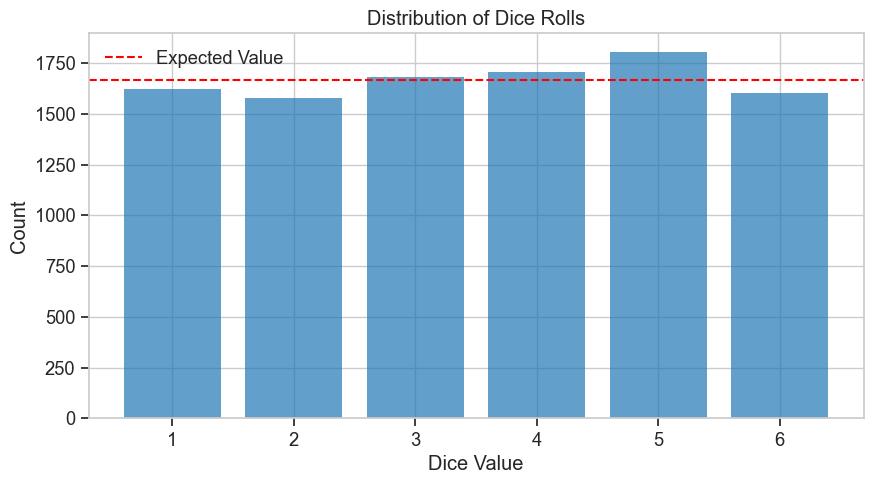

In [5]:
# Demonstrate mutually exclusive events
def mutually_exclusive_demo(n=1000):
    """Demonstrate mutually exclusive events."""
    # Simulate dice rolls
    dice_rolls = np.random.randint(1, 7, size=n)
    
    # Define events
    event_A = dice_rolls == 1  # Rolling a 1
    event_B = dice_rolls == 2  # Rolling a 2
    
    # Calculate probabilities
    p_A = np.mean(event_A)
    p_B = np.mean(event_B)
    p_A_and_B = np.mean(event_A & event_B)  # This should be 0
    p_A_or_B = np.mean(event_A | event_B)
    
    print("=== Mutually Exclusive Events Demo ===")
    print(f"P(Rolling 1) = {p_A:.4f}")
    print(f"P(Rolling 2) = {p_B:.4f}")
    print(f"P(Rolling 1 AND 2) = {p_A_and_B:.4f}")  # Should be 0
    print(f"P(Rolling 1 OR 2) = {p_A_or_B:.4f}")
    print(f"P(1) + P(2) = {p_A + p_B:.4f}")  # For mutually exclusive events, P(A or B) = P(A) + P(B)
    
    # Visualize
    plt.figure(figsize=(10, 5))
    labels = ['1', '2', '3', '4', '5', '6']
    values, counts = np.unique(dice_rolls, return_counts=True)
    plt.bar(labels, [counts[values == i][0] if i in values else 0 for i in range(1, 7)], alpha=0.7)
    plt.axhline(y=n/6, color='r', linestyle='--', label='Expected Value')
    plt.ylabel('Count')
    plt.xlabel('Dice Value')
    plt.title('Distribution of Dice Rolls')
    plt.legend()
    plt.show()

mutually_exclusive_demo(10000)

## 3. Conditional Probability

Conditional probability represents the probability of an event occurring given that another event has already occurred.

The formula for conditional probability is:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Where:
- $P(A|B)$ is the probability of event A given that event B has occurred
- $P(A \cap B)$ is the probability of both events A and B occurring
- $P(B)$ is the probability of event B occurring

=== Conditional Probability Demo ===
P(Red) = 0.5000
P(Face) = 0.2308
P(Red and Face) = 0.1154
P(Face | Red) = 0.2308   Formula: 0.2308
P(Red | Face) = 0.5000


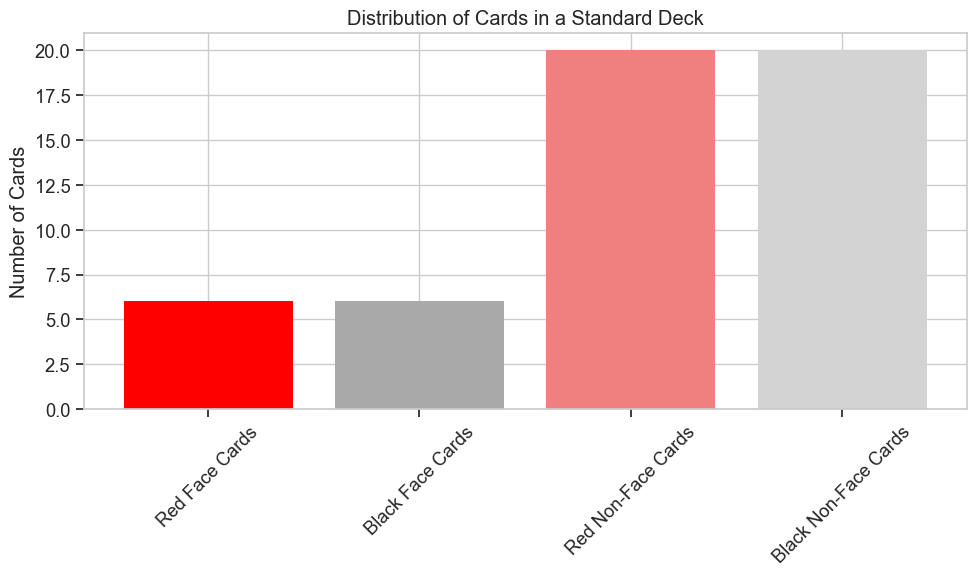

In [6]:
# Define a function to demonstrate conditional probability
def conditional_probability_demo():
    """Demonstrate conditional probability with cards example."""
    
    # Define some events
    def is_red(card):
        return card[1] in ['Hearts', 'Diamonds']
    
    def is_face_card(card):
        return card[0] in ['Jack', 'Queen', 'King']
    
    # Calculate probabilities
    red_cards = [card for card in deck if is_red(card)]
    face_cards = [card for card in deck if is_face_card(card)]
    red_face_cards = [card for card in deck if is_red(card) and is_face_card(card)]
    
    p_red = len(red_cards) / len(deck)
    p_face = len(face_cards) / len(deck)
    p_red_and_face = len(red_face_cards) / len(deck)
    
    # Conditional probabilities
    p_face_given_red = len(red_face_cards) / len(red_cards)  # P(Face | Red)
    p_red_given_face = len(red_face_cards) / len(face_cards)  # P(Red | Face)
    
    # Calculate from formula as verification
    p_face_given_red_formula = p_red_and_face / p_red
    
    print("=== Conditional Probability Demo ===")
    print(f"P(Red) = {p_red:.4f}")
    print(f"P(Face) = {p_face:.4f}")
    print(f"P(Red and Face) = {p_red_and_face:.4f}")
    print(f"P(Face | Red) = {p_face_given_red:.4f}   Formula: {p_face_given_red_formula:.4f}")
    print(f"P(Red | Face) = {p_red_given_face:.4f}")
    
    # Visualize card distribution
    card_categories = {
        "Red Face Cards": len(red_face_cards),
        "Black Face Cards": len(face_cards) - len(red_face_cards),
        "Red Non-Face Cards": len(red_cards) - len(red_face_cards),
        "Black Non-Face Cards": len(deck) - len(red_cards) - len(face_cards) + len(red_face_cards)
    }
    
    plt.figure(figsize=(10, 6))
    plt.bar(card_categories.keys(), card_categories.values(), color=['red', 'darkgray', 'lightcoral', 'lightgray'])
    plt.ylabel('Number of Cards')
    plt.title('Distribution of Cards in a Standard Deck')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

conditional_probability_demo()

=== Independence of Events Demo ===
P(Die1 = 6) = 0.1726
P(Die2 = 3) = 0.1610
P(Die1 = 6 and Die2 = 3) = 0.0266
P(Die1 = 6) × P(Die2 = 3) = 0.0278
P(Die1 = 6 | Die2 = 3) = 0.1652
P(Die2 = 3 | Die1 = 6) = 0.1541

Are the events independent? True


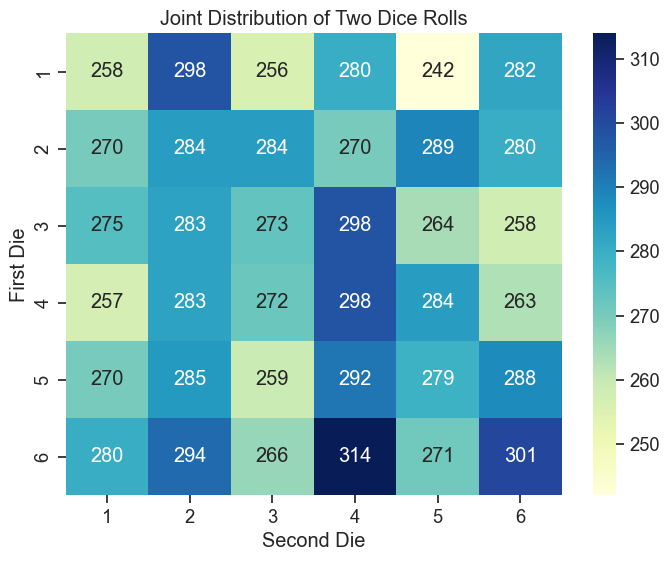

In [7]:
# Demonstrate independence of events
def independence_demo(n=10000):
    """Demo independence of events using dice rolls."""
    
    # Simulate rolling two dice
    dice1 = np.random.randint(1, 7, size=n)
    dice2 = np.random.randint(1, 7, size=n)
    
    # Event A: First die shows 6
    event_A = dice1 == 6
    p_A = np.mean(event_A)
    
    # Event B: Second die shows 3
    event_B = dice2 == 3
    p_B = np.mean(event_B)
    
    # Joint probability
    event_A_and_B = event_A & event_B
    p_A_and_B = np.mean(event_A_and_B)
    
    # Conditional probabilities
    p_A_given_B = np.mean(event_A[event_B]) if np.any(event_B) else 0
    p_B_given_A = np.mean(event_B[event_A]) if np.any(event_A) else 0
    
    print("=== Independence of Events Demo ===")
    print(f"P(Die1 = 6) = {p_A:.4f}")
    print(f"P(Die2 = 3) = {p_B:.4f}")
    print(f"P(Die1 = 6 and Die2 = 3) = {p_A_and_B:.4f}")
    print(f"P(Die1 = 6) × P(Die2 = 3) = {p_A * p_B:.4f}")
    print(f"P(Die1 = 6 | Die2 = 3) = {p_A_given_B:.4f}")
    print(f"P(Die2 = 3 | Die1 = 6) = {p_B_given_A:.4f}")
    
    # Two events are independent if P(A and B) = P(A) × P(B)
    print(f"\nAre the events independent? {abs(p_A_and_B - (p_A * p_B)) < 0.01}")
    
    # Visualize joint distribution
    contingency = pd.crosstab(dice1, dice2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
    plt.title('Joint Distribution of Two Dice Rolls')
    plt.xlabel('Second Die')
    plt.ylabel('First Die')
    plt.show()

independence_demo()

## 4. Probability Distributions

Probability distributions describe the likelihood of all possible outcomes of a random variable. They are crucial for statistical analysis and modeling.

### Discrete Probability Distributions

1. **Bernoulli Distribution**: Models a single binary outcome (success/failure)
2. **Binomial Distribution**: Models the number of successes in n independent Bernoulli trials
3. **Poisson Distribution**: Models the number of events occurring in a fixed time interval

=== Bernoulli Distribution ===
p = 0.4
Theoretical Mean: 0.4
Theoretical Variance: 0.24
Empirical Mean: 0.393
Empirical Variance: 0.23855100000000004


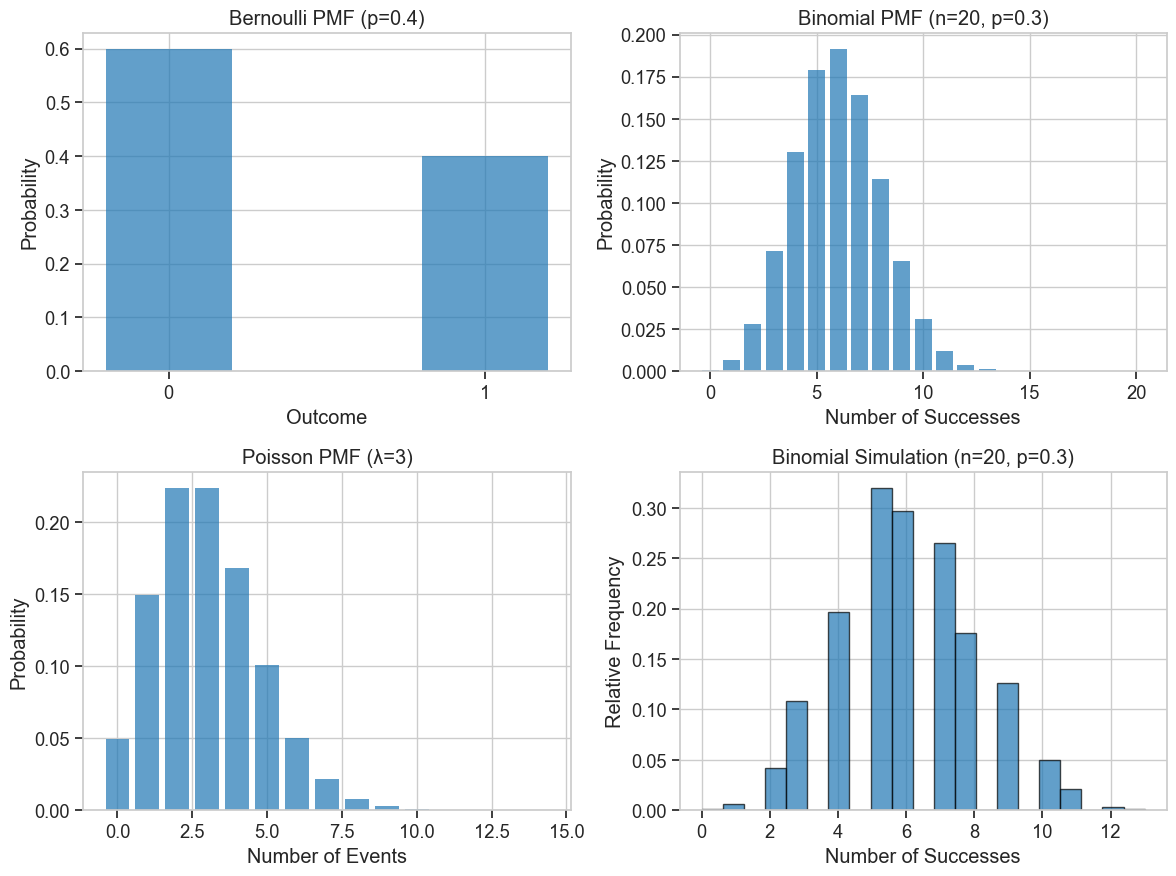


=== Binomial Distribution ===
n = 20, p = 0.3
Theoretical Mean: 6.0
Theoretical Variance: 4.199999999999999
Empirical Mean: 6.051
Empirical Variance: 4.082399

=== Poisson Distribution ===
λ = 3
Theoretical Mean: 3
Theoretical Variance: 3
Empirical Mean: 3.061
Empirical Variance: 2.9972789999999994


In [8]:
# Bernoulli distribution
p_success = 0.4  # probability of success
bernoulli = stats.bernoulli(p_success)

# Sample 1000 values from bernoulli distribution
bernoulli_samples = bernoulli.rvs(size=1000)
bernoulli_values, bernoulli_counts = np.unique(bernoulli_samples, return_counts=True)

# Calculate and print mean and variance
print("=== Bernoulli Distribution ===")
print(f"p = {p_success}")
print(f"Theoretical Mean: {p_success}")
print(f"Theoretical Variance: {p_success * (1 - p_success)}")
print(f"Empirical Mean: {np.mean(bernoulli_samples)}")
print(f"Empirical Variance: {np.var(bernoulli_samples)}")

plt.figure(figsize=(12, 9))

# Plot Bernoulli PMF
plt.subplot(2, 2, 1)
x = np.array([0, 1])
plt.bar(x, [1-p_success, p_success], alpha=0.7, width=0.4)
plt.title('Bernoulli PMF (p=0.4)')
plt.xticks([0, 1])
plt.xlabel('Outcome')
plt.ylabel('Probability')

# Binomial distribution parameters
n, p = 20, 0.3  # number of trials, probability of success
binomial = stats.binom(n, p)

# Plot Binomial PMF
plt.subplot(2, 2, 2)
x = np.arange(0, n+1)
plt.bar(x, binomial.pmf(x), alpha=0.7)
plt.title(f'Binomial PMF (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

# Plot Binomial simulation
plt.subplot(2, 2, 4)
binomial_samples = binomial.rvs(size=1000)
plt.hist(binomial_samples, bins=n+1, alpha=0.7, density=True, edgecolor='black')
plt.title(f'Binomial Simulation (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Relative Frequency')

# Poisson distribution parameter
lam = 3  # average number of events per interval
poisson = stats.poisson(lam)

# Plot Poisson PMF
plt.subplot(2, 2, 3)
x = np.arange(0, 15)
plt.bar(x, poisson.pmf(x), alpha=0.7)
plt.title(f'Poisson PMF (λ={lam})')
plt.xlabel('Number of Events')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# Print statistics for binomial and poisson
print("\n=== Binomial Distribution ===")
print(f"n = {n}, p = {p}")
print(f"Theoretical Mean: {n*p}")
print(f"Theoretical Variance: {n*p*(1-p)}")
print(f"Empirical Mean: {np.mean(binomial_samples)}")
print(f"Empirical Variance: {np.var(binomial_samples)}")

poisson_samples = poisson.rvs(size=1000)
print("\n=== Poisson Distribution ===")
print(f"λ = {lam}")
print(f"Theoretical Mean: {lam}")
print(f"Theoretical Variance: {lam}")
print(f"Empirical Mean: {np.mean(poisson_samples)}")
print(f"Empirical Variance: {np.var(poisson_samples)}")

### Continuous Probability Distributions

1. **Uniform Distribution**: All values in a range have equal probability
2. **Normal (Gaussian) Distribution**: The bell-shaped curve that appears in many natural phenomena
3. **Exponential Distribution**: Models the time between events in a Poisson process

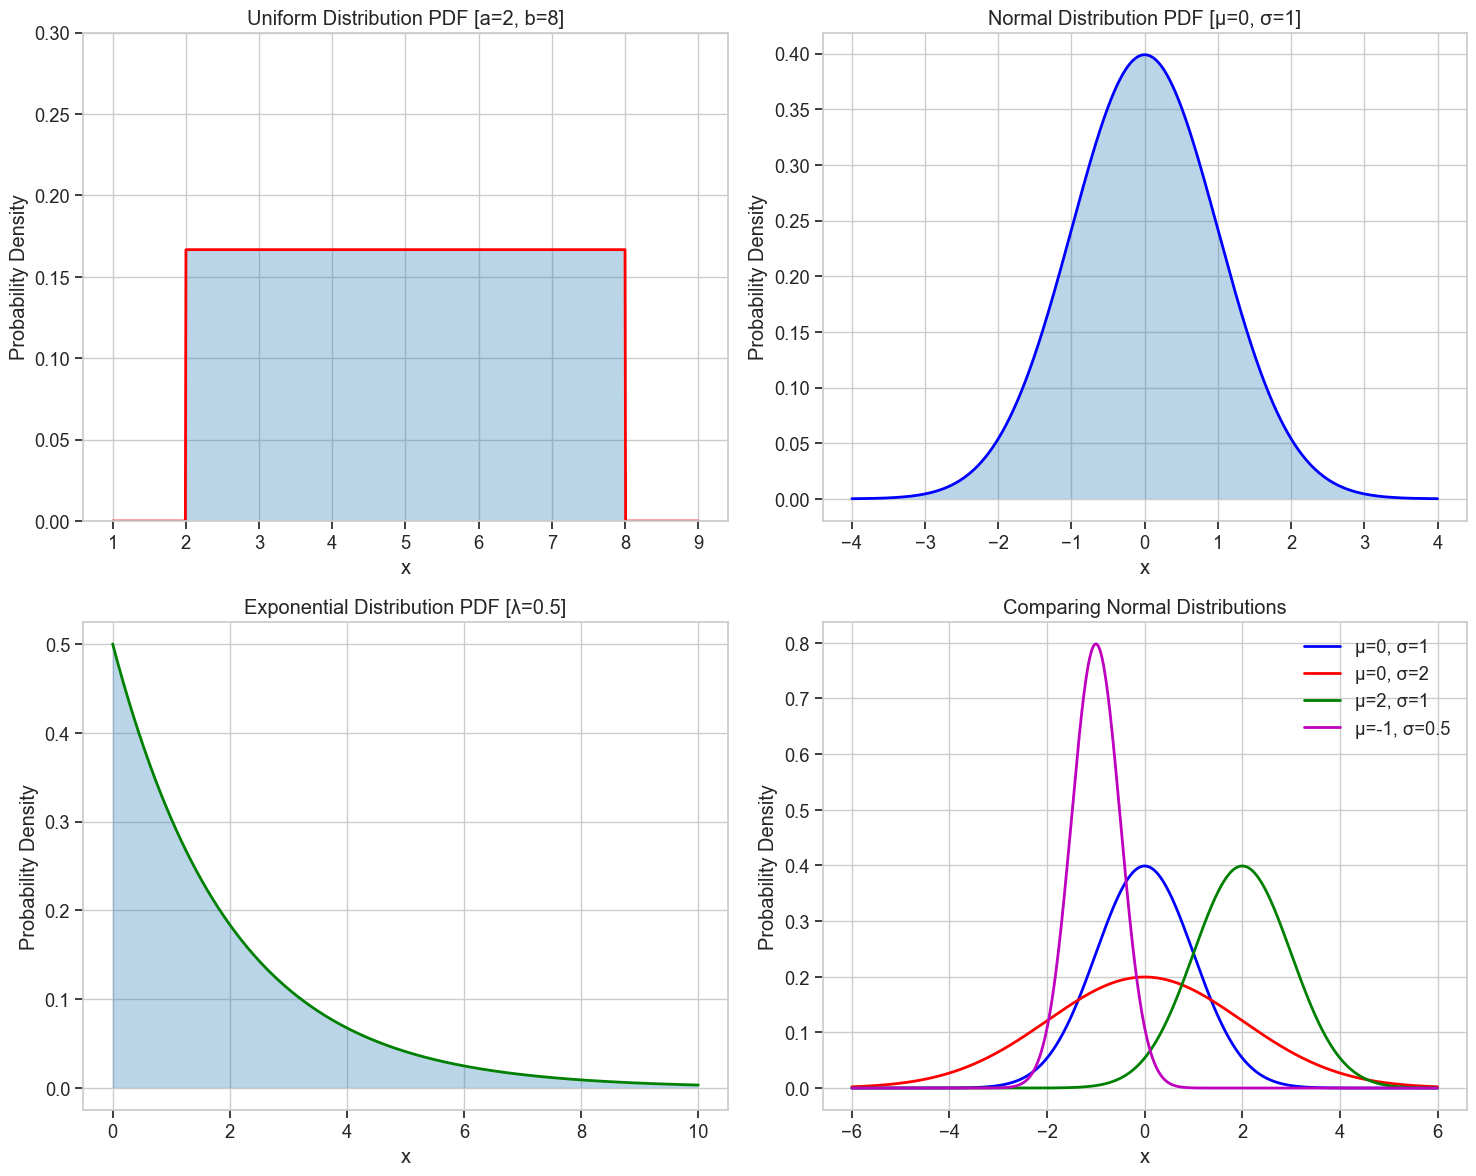

=== Continuous Distributions: Theory vs. Simulation ===

Uniform Distribution:
Theoretical Mean: 5.0
Theoretical Variance: 3.0
Empirical Mean: 5.0150
Empirical Variance: 2.9600

Normal Distribution:
Theoretical Mean: -1
Theoretical Variance: 0.25
Empirical Mean: 0.0013
Empirical Variance: 0.9933

Exponential Distribution:
Theoretical Mean: 2.0
Theoretical Variance: 4.0
Empirical Mean: 1.9918
Empirical Variance: 4.0752


In [9]:
plt.figure(figsize=(15, 12))

# Uniform distribution parameters
a, b = 2, 8  # lower and upper bounds
uniform = stats.uniform(a, b-a)

# Plot uniform PDF
plt.subplot(2, 2, 1)
x = np.linspace(a-1, b+1, 1000)
plt.plot(x, uniform.pdf(x), 'r-', lw=2)
plt.fill_between(x, uniform.pdf(x), where=(x >= a) & (x <= b), alpha=0.3)
plt.title(f'Uniform Distribution PDF [a={a}, b={b}]')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 0.3)

# Normal distribution parameters
mu, sigma = 0, 1  # mean and standard deviation
normal = stats.norm(mu, sigma)

# Plot normal PDF
plt.subplot(2, 2, 2)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, normal.pdf(x), 'b-', lw=2)
plt.fill_between(x, normal.pdf(x), alpha=0.3)
plt.title(f'Normal Distribution PDF [μ={mu}, σ={sigma}]')
plt.xlabel('x')
plt.ylabel('Probability Density')

# Exponential distribution parameter
lam = 0.5  # rate parameter
exponential = stats.expon(scale=1/lam)

# Plot exponential PDF
plt.subplot(2, 2, 3)
x = np.linspace(0, 10, 1000)
plt.plot(x, exponential.pdf(x), 'g-', lw=2)
plt.fill_between(x, exponential.pdf(x), alpha=0.3)
plt.title(f'Exponential Distribution PDF [λ={lam}]')
plt.xlabel('x')
plt.ylabel('Probability Density')

# Compare different normal distributions
plt.subplot(2, 2, 4)
params = [(0, 1), (0, 2), (2, 1), (-1, 0.5)]
colors = ['b', 'r', 'g', 'm']
labels = [f'μ={mu}, σ={sigma}' for mu, sigma in params]

for i, (mu, sigma) in enumerate(params):
    x = np.linspace(-6, 6, 1000)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, color=colors[i], lw=2, label=labels[i])

plt.title('Comparing Normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

# Generate samples and compare to theoretical values
print("=== Continuous Distributions: Theory vs. Simulation ===")

# Uniform
uniform_samples = uniform.rvs(size=10000)
print("\nUniform Distribution:")
print(f"Theoretical Mean: {(a+b)/2}")
print(f"Theoretical Variance: {(b-a)**2/12}")
print(f"Empirical Mean: {np.mean(uniform_samples):.4f}")
print(f"Empirical Variance: {np.var(uniform_samples):.4f}")

# Normal
normal_samples = normal.rvs(size=10000)
print("\nNormal Distribution:")
print(f"Theoretical Mean: {mu}")
print(f"Theoretical Variance: {sigma**2}")
print(f"Empirical Mean: {np.mean(normal_samples):.4f}")
print(f"Empirical Variance: {np.var(normal_samples):.4f}")

# Exponential
exponential_samples = exponential.rvs(size=10000)
print("\nExponential Distribution:")
print(f"Theoretical Mean: {1/lam}")
print(f"Theoretical Variance: {1/lam**2}")
print(f"Empirical Mean: {np.mean(exponential_samples):.4f}")
print(f"Empirical Variance: {np.var(exponential_samples):.4f}")

## 5. Random Variables

A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. Random variables can be:

1. **Discrete**: Can take on only distinct, separate values (e.g., number of heads in coin flips)
2. **Continuous**: Can take on any value within a continuous range (e.g., height, weight, time)

Let's explore random variables further:

=== Central Limit Theorem Demonstration ===
Sample size 1:
  Empirical mean: 0.9925, Expected mean: 1.0000
  Empirical std: 0.9783, Expected std: 1.0000
Sample size 2:
  Empirical mean: 1.0230, Expected mean: 1.0000
  Empirical std: 0.7328, Expected std: 0.7071
Sample size 5:
  Empirical mean: 0.9962, Expected mean: 1.0000
  Empirical std: 0.4434, Expected std: 0.4472
Sample size 30:
  Empirical mean: 0.9999, Expected mean: 1.0000
  Empirical std: 0.1786, Expected std: 0.1826


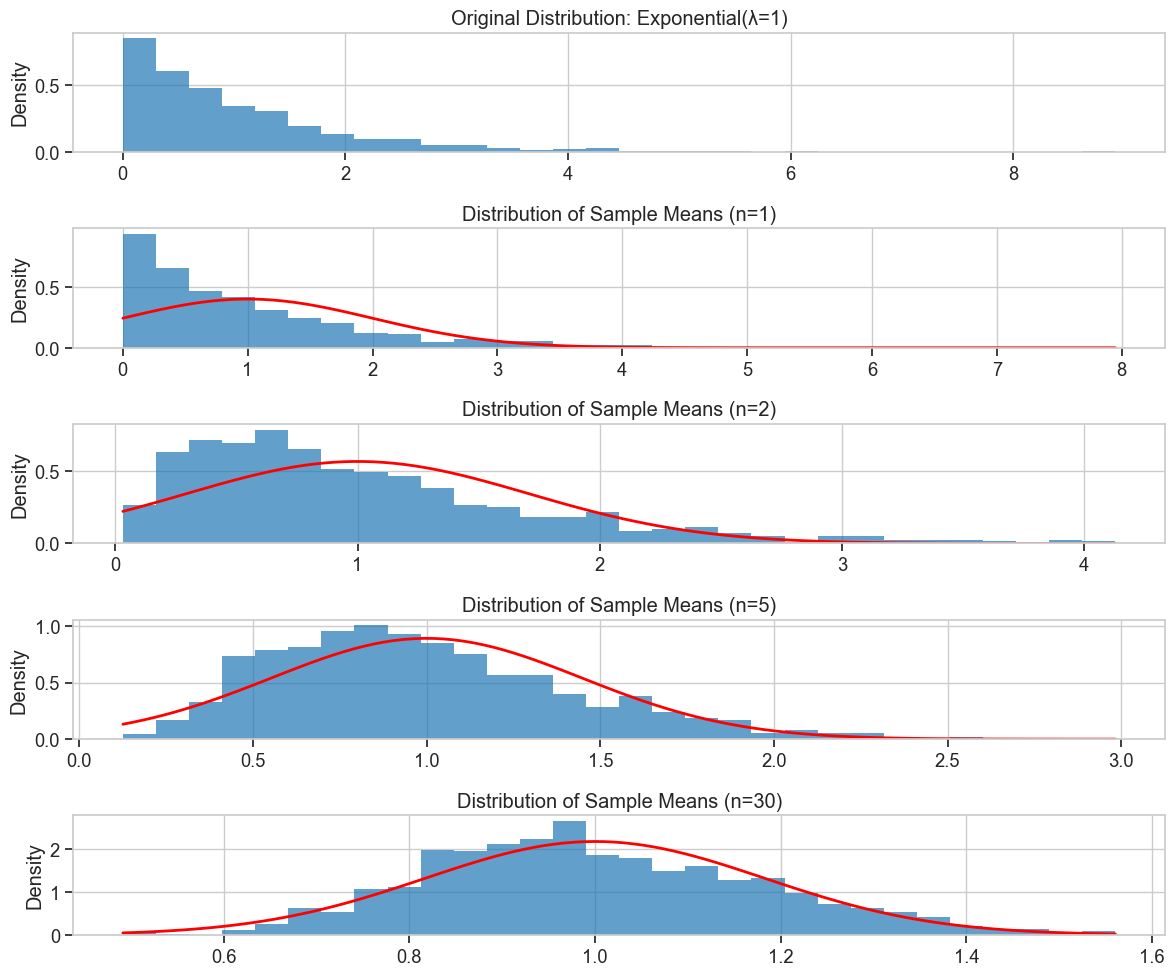

In [10]:
# Function to visualize the Central Limit Theorem
def central_limit_theorem_demo(distribution='exponential', n_samples=1000, sample_sizes=[1, 2, 5, 30]):
    """
    Demonstrate the Central Limit Theorem by showing how the distribution of
    sample means approaches a normal distribution regardless of the original distribution.
    """
    plt.figure(figsize=(12, 10))
    
    # Choose distribution
    if distribution == 'uniform':
        # Uniform distribution from 0 to 1
        get_sample = lambda size: np.random.uniform(0, 1, size)
        dist_name = "Uniform(0, 1)"
        theoretical_mean = 0.5
        theoretical_std = 1/np.sqrt(12)
    elif distribution == 'exponential':
        # Exponential distribution with lambda=1
        get_sample = lambda size: np.random.exponential(1, size)
        dist_name = "Exponential(λ=1)"
        theoretical_mean = 1
        theoretical_std = 1
    elif distribution == 'binomial':
        # Binomial distribution with n=10, p=0.3
        get_sample = lambda size: np.random.binomial(10, 0.3, size)
        dist_name = "Binomial(n=10, p=0.3)"
        theoretical_mean = 10 * 0.3
        theoretical_std = np.sqrt(10 * 0.3 * 0.7)
    else:
        raise ValueError("Distribution must be 'uniform', 'exponential', or 'binomial'")
    
    # First, plot the original distribution
    plt.subplot(len(sample_sizes) + 1, 1, 1)
    original_samples = get_sample(n_samples)
    plt.hist(original_samples, bins=30, alpha=0.7, density=True)
    plt.title(f'Original Distribution: {dist_name}')
    plt.ylabel('Density')
    
    # Then plot the distribution of sample means for different sample sizes
    for i, sample_size in enumerate(sample_sizes):
        # Generate many samples of size sample_size and calculate their means
        sample_means = [np.mean(get_sample(sample_size)) for _ in range(n_samples)]
        
        plt.subplot(len(sample_sizes) + 1, 1, i + 2)
        plt.hist(sample_means, bins=30, alpha=0.7, density=True)
        
        # Overlay the theoretical normal distribution
        x = np.linspace(min(sample_means), max(sample_means), 100)
        expected_std = theoretical_std / np.sqrt(sample_size)
        plt.plot(x, stats.norm.pdf(x, theoretical_mean, expected_std), 'r-', lw=2)
        
        plt.title(f'Distribution of Sample Means (n={sample_size})')
        plt.ylabel('Density')
        
        # Print statistics
        empirical_mean = np.mean(sample_means)
        empirical_std = np.std(sample_means)
        expected_std = theoretical_std / np.sqrt(sample_size)
        print(f"Sample size {sample_size}:")
        print(f"  Empirical mean: {empirical_mean:.4f}, Expected mean: {theoretical_mean:.4f}")
        print(f"  Empirical std: {empirical_std:.4f}, Expected std: {expected_std:.4f}")
    
    plt.tight_layout()
    plt.show()

# Demonstrate CLT with different distributions
print("=== Central Limit Theorem Demonstration ===")
central_limit_theorem_demo(distribution='exponential')

=== Monte Carlo Estimation of π ===


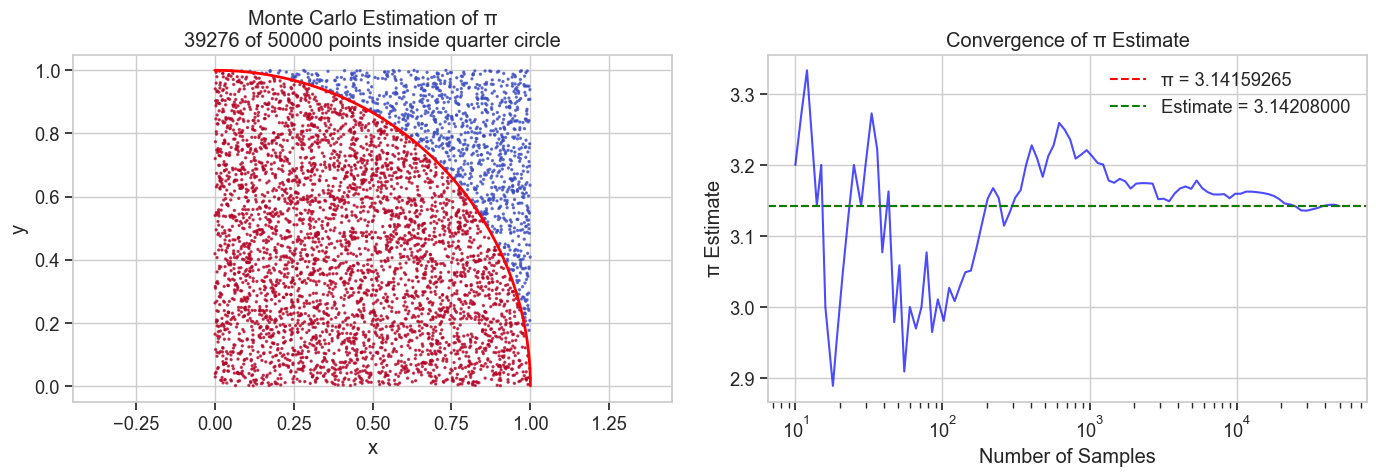

Estimated π: 3.14208000
Actual π: 3.14159265
Absolute Error: 0.00048735
Relative Error: 0.015513%


In [11]:
# Function for Monte Carlo estimation of pi
def estimate_pi_monte_carlo(n_samples=10000, show_progress=True):
    """
    Estimate the value of π using Monte Carlo simulation.
    We'll use the fact that the area of a circle with radius r is πr²,
    and the area of a square with side length 2r is (2r)² = 4r².
    So the ratio of the circle area to the square area is π/4.
    """
    # Generate random points in the [0,1] × [0,1] square
    points = np.random.random((n_samples, 2))
    
    # Count points inside the unit circle (centered at (0,0) with radius 1)
    # We'll use the quarter circle in the first quadrant
    inside_circle = np.sum(np.sum(points**2, axis=1) <= 1)
    
    # Ratio of points inside circle to total points approximates π/4
    pi_estimate = 4 * inside_circle / n_samples
    
    if show_progress:
        # Visualization of convergence
        sample_sizes = np.logspace(1, np.log10(n_samples), 100).astype(int)
        estimates = []
        
        for size in sample_sizes:
            points_subset = points[:size]
            inside_subset = np.sum(np.sum(points_subset**2, axis=1) <= 1)
            estimates.append(4 * inside_subset / size)
        
        plt.figure(figsize=(14, 5))
        
        # Plot the points
        plt.subplot(1, 2, 1)
        plt.scatter(points[:5000, 0], points[:5000, 1], c=np.sum(points[:5000]**2, axis=1) <= 1, 
                   cmap='coolwarm', s=2, alpha=0.7)
        
        # Draw the quarter circle
        theta = np.linspace(0, np.pi/2, 100)
        x = np.cos(theta)
        y = np.sin(theta)
        plt.plot(x, y, 'r-', lw=2)
        
        plt.title(f'Monte Carlo Estimation of π\n{inside_circle} of {n_samples} points inside quarter circle')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        plt.grid(True)
        
        # Plot convergence
        plt.subplot(1, 2, 2)
        plt.semilogx(sample_sizes, estimates, 'b-', alpha=0.7)
        plt.axhline(y=np.pi, color='r', linestyle='--', label=f'π = {np.pi:.8f}')
        plt.axhline(y=pi_estimate, color='g', linestyle='--', 
                  label=f'Estimate = {pi_estimate:.8f}')
        plt.title('Convergence of π Estimate')
        plt.xlabel('Number of Samples')
        plt.ylabel('π Estimate')
        plt.grid(True)
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    return pi_estimate, inside_circle, n_samples

# Run pi estimation
print("=== Monte Carlo Estimation of π ===")
pi_estimate, inside, total = estimate_pi_monte_carlo(n_samples=50000)
print(f"Estimated π: {pi_estimate:.8f}")
print(f"Actual π: {np.pi:.8f}")
print(f"Absolute Error: {abs(pi_estimate - np.pi):.8f}")
print(f"Relative Error: {abs(pi_estimate - np.pi) / np.pi * 100:.6f}%")

## 6. Expected Value and Variance

The **expected value** (or mean) of a random variable is the long-run average value of repetitions of the experiment. The **variance** measures how far a set of values are spread out from their expected value.

For a discrete random variable X with probability mass function P(X=x):

$$E[X] = \sum_{x} x \cdot P(X=x)$$

$$Var(X) = E[(X-E[X])^2] = \sum_{x} (x-E[X])^2 \cdot P(X=x)$$

For a continuous random variable with probability density function f(x):

$$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx$$

$$Var(X) = E[(X-E[X])^2] = \int_{-\infty}^{\infty} (x-E[X])^2 \cdot f(x) \, dx$$

=== Expected Value and Variance for Discrete Random Variables ===

Fair Die:
Expected Value: 3.5
Variance: 2.9166666666666665
Standard Deviation: 1.707825127659933

Weighted Die (favoring 6):
Expected Value: 4.5
Variance: 3.25
Standard Deviation: 1.8027756377319946

Number of Heads in 3 Fair Coin Tosses:
Expected Value: 1.5
Variance: 0.75
Standard Deviation: 0.8660254037844386



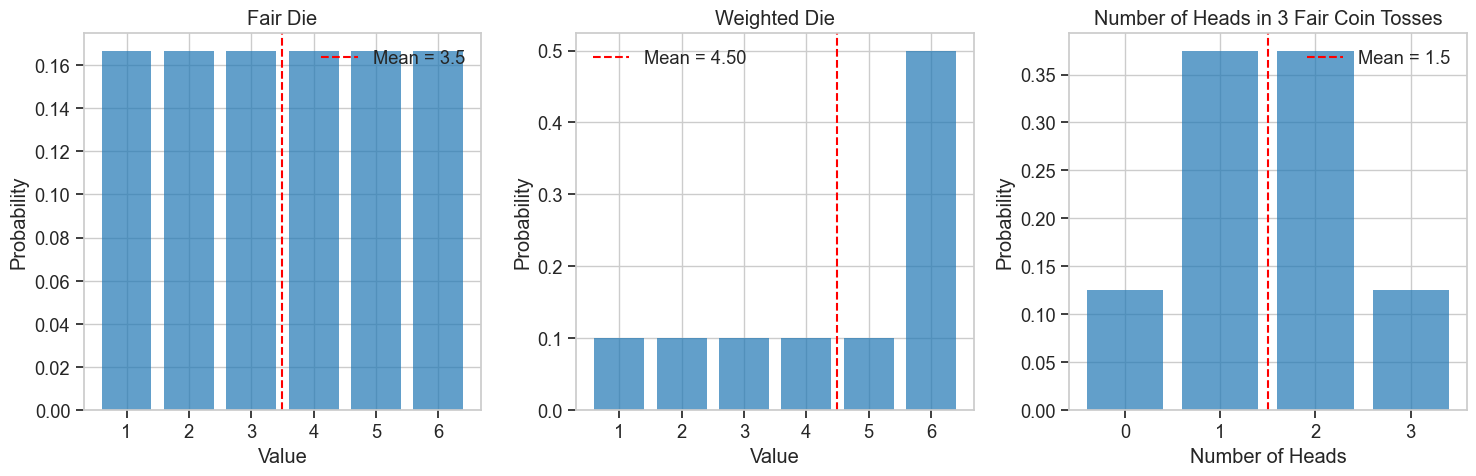


=== Law of Large Numbers Demonstration ===


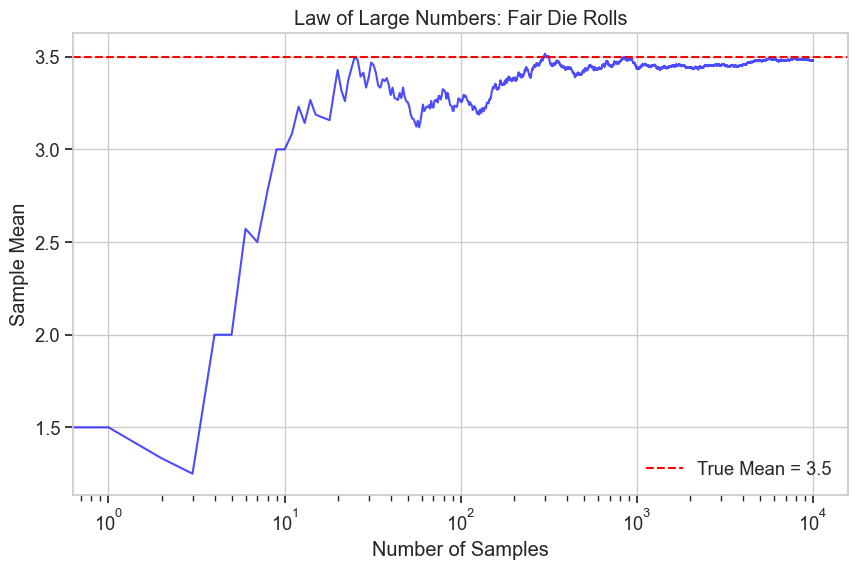

Final sample mean after 10000 samples: 3.479100
True mean: 3.500000
Difference: 0.020900


In [12]:
# Function to calculate expected value and variance for a discrete random variable
def discrete_expectation_variance(values, probabilities):
    """
    Calculate the expected value and variance for a discrete random variable.
    
    Args:
        values: array of possible values the random variable can take
        probabilities: corresponding probabilities for each value
    
    Returns:
        expected value and variance
    """
    # Validate inputs
    if len(values) != len(probabilities) or abs(sum(probabilities) - 1) > 1e-10:
        raise ValueError("Values and probabilities must have the same length, and probabilities must sum to 1")
    
    # Calculate expected value
    expected_value = np.sum(values * probabilities)
    
    # Calculate variance
    variance = np.sum((values - expected_value)**2 * probabilities)
    
    return expected_value, variance

# Examples of discrete random variables
print("=== Expected Value and Variance for Discrete Random Variables ===\n")

# Example 1: Fair die
die_values = np.array([1, 2, 3, 4, 5, 6])
die_probs = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
die_ev, die_var = discrete_expectation_variance(die_values, die_probs)

print("Fair Die:")
print(f"Expected Value: {die_ev}")
print(f"Variance: {die_var}")
print(f"Standard Deviation: {np.sqrt(die_var)}\n")

# Example 2: Weighted die (loaded to favor 6)
weighted_die_values = np.array([1, 2, 3, 4, 5, 6])
weighted_die_probs = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
weighted_die_ev, weighted_die_var = discrete_expectation_variance(weighted_die_values, weighted_die_probs)

print("Weighted Die (favoring 6):")
print(f"Expected Value: {weighted_die_ev}")
print(f"Variance: {weighted_die_var}")
print(f"Standard Deviation: {np.sqrt(weighted_die_var)}\n")

# Example 3: Number of heads in 3 fair coin tosses
coin_values = np.array([0, 1, 2, 3])  # 0, 1, 2, or 3 heads
coin_probs = np.array([1/8, 3/8, 3/8, 1/8])  # binomial probabilities
coin_ev, coin_var = discrete_expectation_variance(coin_values, coin_probs)

print("Number of Heads in 3 Fair Coin Tosses:")
print(f"Expected Value: {coin_ev}")
print(f"Variance: {coin_var}")
print(f"Standard Deviation: {np.sqrt(coin_var)}\n")

# Visualize these random variables
plt.figure(figsize=(15, 5))

# Fair die
plt.subplot(1, 3, 1)
plt.bar(die_values, die_probs, alpha=0.7)
plt.axvline(x=die_ev, color='r', linestyle='--', label=f'Mean = {die_ev}')
plt.title('Fair Die')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

# Weighted die
plt.subplot(1, 3, 2)
plt.bar(weighted_die_values, weighted_die_probs, alpha=0.7)
plt.axvline(x=weighted_die_ev, color='r', linestyle='--', label=f'Mean = {weighted_die_ev:.2f}')
plt.title('Weighted Die')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()

# Coin tosses
plt.subplot(1, 3, 3)
plt.bar(coin_values, coin_probs, alpha=0.7)
plt.axvline(x=coin_ev, color='r', linestyle='--', label=f'Mean = {coin_ev}')
plt.title('Number of Heads in 3 Fair Coin Tosses')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.xticks(coin_values)
plt.legend()

plt.tight_layout()
plt.show()

# Demonstrate Law of Large Numbers
def law_of_large_numbers_demo(random_var_fn, true_mean, n_samples=10000, title="Law of Large Numbers"):
    """
    Visualize the Law of Large Numbers.
    
    Args:
        random_var_fn: function that generates random samples
        true_mean: the theoretical mean of the distribution
        n_samples: number of samples to generate
        title: title for the plot
    """
    # Generate samples
    samples = random_var_fn(n_samples)
    
    # Calculate running mean
    running_mean = np.cumsum(samples) / np.arange(1, n_samples+1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(running_mean, 'b-', alpha=0.7)
    plt.axhline(y=true_mean, color='r', linestyle='--', label=f'True Mean = {true_mean}')
    plt.xscale('log')
    plt.title(title)
    plt.xlabel('Number of Samples')
    plt.ylabel('Sample Mean')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print(f"Final sample mean after {n_samples} samples: {running_mean[-1]:.6f}")
    print(f"True mean: {true_mean:.6f}")
    print(f"Difference: {abs(running_mean[-1] - true_mean):.6f}")

# Demonstrate LLN with fair die rolls
print("\n=== Law of Large Numbers Demonstration ===")
law_of_large_numbers_demo(
    lambda n: np.random.randint(1, 7, size=n),
    true_mean=3.5,
    title="Law of Large Numbers: Fair Die Rolls"
)

## 7. Bayes' Theorem and Applications

Bayes' theorem provides a way to update our belief about the probability of an event based on new evidence. The theorem is stated as:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Where:
- P(A|B) is the posterior probability: the probability of hypothesis A given the data B
- P(B|A) is the likelihood: the probability of data B given hypothesis A
- P(A) is the prior probability: our initial belief about the probability of A
- P(B) is the marginal likelihood: the total probability of observing data B

This theorem is foundational for many machine learning algorithms, especially in Bayesian statistics.

=== Medical Test Example ===
Disease prevalence: 1.0%
Test sensitivity: 95.0%
Test specificity: 90.0%
Probability of testing positive: 10.85%
Probability of having disease given positive test: 8.76%


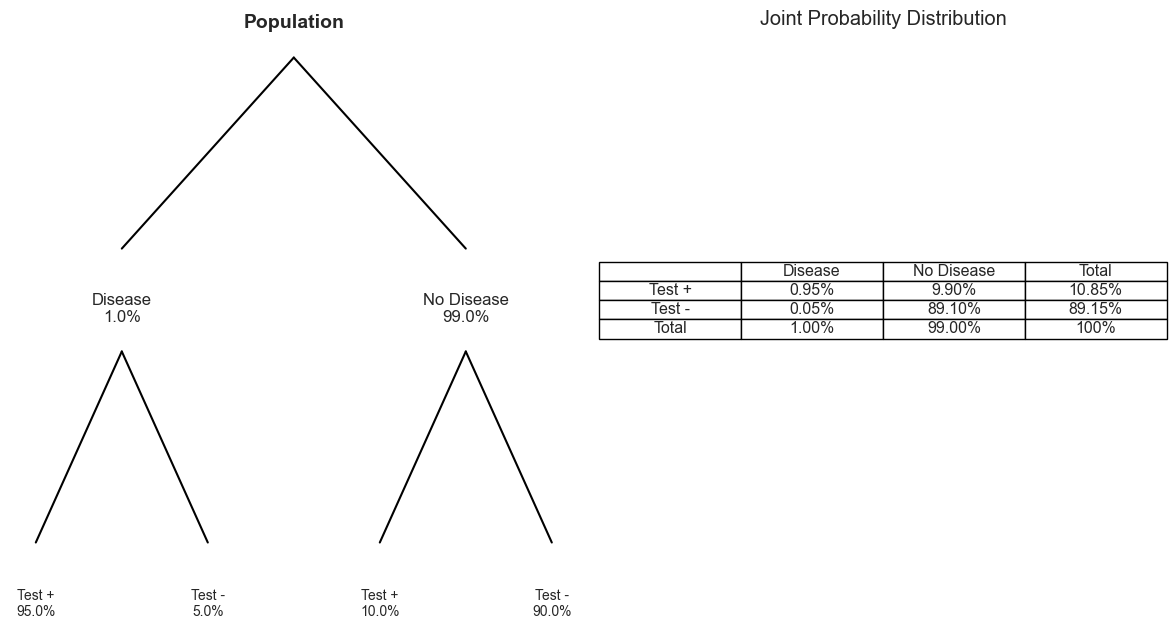


=== Bayesian Updating Example ===
Scenario: Testing whether a coin is fair or biased


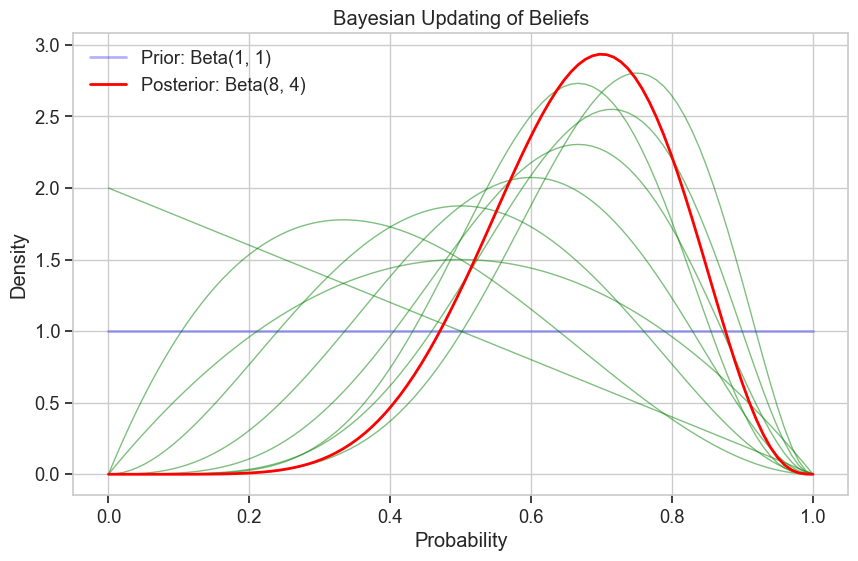

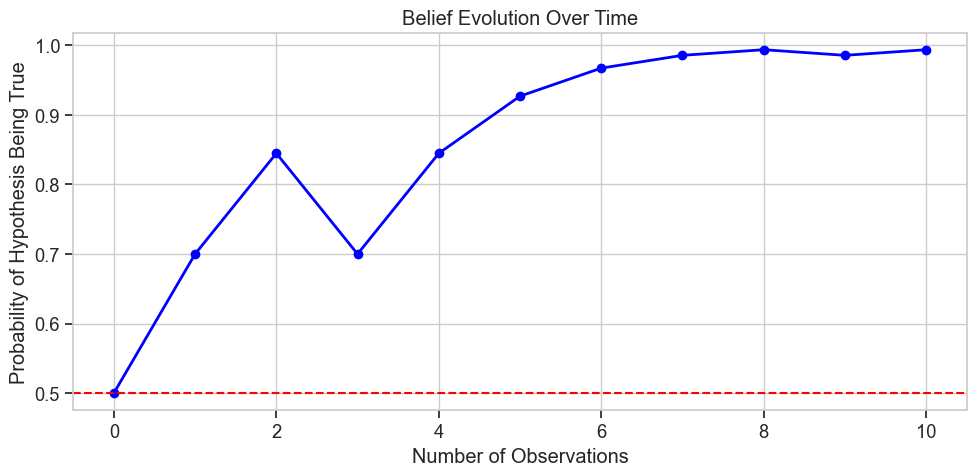

Initial belief: 0.5000
Final belief after 10 observations: 0.9938


0.9938417611380492

In [13]:
# Demonstrating Bayes' Theorem with a medical test example
def bayes_theorem_medical_test():
    """
    Example: Medical Test
    - Disease prevalence: 1% (prior)
    - Test sensitivity: 95% (true positive rate) - P(positive | disease)
    - Test specificity: 90% (true negative rate) - P(negative | no disease)
    
    Question: If a person tests positive, what's the probability they have the disease?
    """
    # Given information
    prior_probability = 0.01  # P(D) - prevalence of disease
    sensitivity = 0.95        # P(+ | D) - test sensitivity
    specificity = 0.90        # P(- | not D) - test specificity
    
    # Calculate false positive rate
    false_positive_rate = 1 - specificity  # P(+ | not D)
    
    # Calculate marginal likelihood - P(+)
    marginal = (sensitivity * prior_probability) + (false_positive_rate * (1 - prior_probability))
    
    # Calculate posterior using Bayes' theorem - P(D | +)
    posterior = (sensitivity * prior_probability) / marginal
    
    print("=== Medical Test Example ===")
    print(f"Disease prevalence: {prior_probability:.1%}")
    print(f"Test sensitivity: {sensitivity:.1%}")
    print(f"Test specificity: {specificity:.1%}")
    print(f"Probability of testing positive: {marginal:.2%}")
    print(f"Probability of having disease given positive test: {posterior:.2%}")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    
    # Plot the probability tree
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.text(0.5, 0.9, 'Population', ha='center', fontsize=14, fontweight='bold')
    plt.text(0.3, 0.7, f'Disease\n{prior_probability:.1%}', ha='center', fontsize=12)
    plt.text(0.7, 0.7, f'No Disease\n{(1-prior_probability):.1%}', ha='center', fontsize=12)
    plt.text(0.2, 0.5, f'Test +\n{sensitivity:.1%}', ha='center', fontsize=10)
    plt.text(0.4, 0.5, f'Test -\n{(1-sensitivity):.1%}', ha='center', fontsize=10)
    plt.text(0.6, 0.5, f'Test +\n{false_positive_rate:.1%}', ha='center', fontsize=10)
    plt.text(0.8, 0.5, f'Test -\n{specificity:.1%}', ha='center', fontsize=10)
    
    # Draw tree lines
    plt.plot([0.5, 0.3], [0.88, 0.75], 'k-')
    plt.plot([0.5, 0.7], [0.88, 0.75], 'k-')
    plt.plot([0.3, 0.2], [0.68, 0.55], 'k-')
    plt.plot([0.3, 0.4], [0.68, 0.55], 'k-')
    plt.plot([0.7, 0.6], [0.68, 0.55], 'k-')
    plt.plot([0.7, 0.8], [0.68, 0.55], 'k-')
    
    # Create a table for the joint distribution
    plt.subplot(1, 2, 2)
    # Calculate joint probabilities
    p_disease_positive = prior_probability * sensitivity
    p_disease_negative = prior_probability * (1 - sensitivity)
    p_no_disease_positive = (1 - prior_probability) * false_positive_rate
    p_no_disease_negative = (1 - prior_probability) * specificity
    
    data = [
        ['', 'Disease', 'No Disease', 'Total'],
        ['Test +', f'{p_disease_positive:.2%}', f'{p_no_disease_positive:.2%}', f'{p_disease_positive + p_no_disease_positive:.2%}'],
        ['Test -', f'{p_disease_negative:.2%}', f'{p_no_disease_negative:.2%}', f'{p_disease_negative + p_no_disease_negative:.2%}'],
        ['Total', f'{prior_probability:.2%}', f'{1-prior_probability:.2%}', '100%']
    ]
    
    plt.table(cellText=data, loc='center', cellLoc='center', edges='closed')
    plt.axis('off')
    plt.title('Joint Probability Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return posterior

# Run the Bayes' theorem example
posterior_medical = bayes_theorem_medical_test()

# Bayesian updating example
def bayesian_updating(prior_belief, data_likelihood, steps=5):
    """
    Demonstrate Bayesian updating - how our belief changes as we observe more data.
    
    Args:
        prior_belief: initial probability of hypothesis being true
        data_likelihood: tuple (P(data|H), P(data|not H))
        steps: number of data points to observe
    """
    # Store beliefs over time
    beliefs = [prior_belief]
    posterior = prior_belief
    
    plt.figure(figsize=(10, 6))
    
    # Initial belief
    x = np.linspace(0, 1, 100)
    
    # Plot initial beta distribution (we'll use Beta(1,1) which is uniform)
    alpha, beta = 1, 1
    plt.plot(x, stats.beta.pdf(x, alpha, beta), 'b-', lw=2, alpha=0.3, 
             label=f'Prior: Beta({alpha}, {beta})')
    
    # Simulate observing data and updating beliefs
    for i in range(steps):
        # Generate random data (biased towards hypothesis being true)
        data_observed = np.random.random() < data_likelihood[0]
        
        # Calculate likelihood of observed data
        if data_observed:
            likelihood = data_likelihood[0] if posterior > 0.5 else data_likelihood[1]
            alpha += 1  # Add a success
        else:
            likelihood = 1 - data_likelihood[0] if posterior > 0.5 else 1 - data_likelihood[1]
            beta += 1  # Add a failure
        
        # Calculate marginal likelihood
        marginal = likelihood * posterior + (1 - likelihood) * (1 - posterior)
        
        # Update posterior using Bayes' theorem
        posterior = (likelihood * posterior) / marginal
        beliefs.append(posterior)
        
        # Plot updated beta distribution
        if i == steps - 1:
            plt.plot(x, stats.beta.pdf(x, alpha, beta), 'r-', lw=2,
                     label=f'Posterior: Beta({alpha}, {beta})')
        else:
            plt.plot(x, stats.beta.pdf(x, alpha, beta), 'g-', lw=1, alpha=0.5)
    
    plt.title('Bayesian Updating of Beliefs')
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # Plot belief over time
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(beliefs)), beliefs, 'bo-', lw=2)
    plt.axhline(y=0.5, color='r', linestyle='--')
    plt.title('Belief Evolution Over Time')
    plt.xlabel('Number of Observations')
    plt.ylabel('Probability of Hypothesis Being True')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print(f"Initial belief: {prior_belief:.4f}")
    print(f"Final belief after {steps} observations: {posterior:.4f}")
    
    return posterior

# Demonstrate Bayesian updating
print("\n=== Bayesian Updating Example ===")
print("Scenario: Testing whether a coin is fair or biased")
bayesian_updating(
    prior_belief=0.5,  # Initial belief: 50% chance coin is fair
    data_likelihood=(0.7, 0.3),  # P(heads|fair) = 0.5, P(heads|biased) = 0.7
    steps=10
)

## 8. Probability in Data Science Applications

Probability is foundational in many data science techniques. Let's explore some practical applications:

1. **Risk Assessment**: Using probability to quantify and manage uncertainty
2. **A/B Testing**: Statistical hypothesis testing to compare two versions
3. **Predictive Modeling**: Using probability distributions to make predictions
4. **Anomaly Detection**: Identifying rare events using probability thresholds